# Introduction to Data Science 2025

# Week 6: Recap

## Exercise 1 | Linear regression with feature selection

Download the [TED Talks](https://www.kaggle.com/rounakbanik/ted-talks) dataset from Kaggle. Your task is to predict both the ratings and the number of views of a given TED talk. You should focus only on the <span style="font-weight: bold">ted_main</span> table.

1. Download the data, extract the following ratings from column <span style="font-weight: bold">ratings</span>: <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, <span style="font-weight: bold">Inspiring</span>. Store these values into respective columns so that they are easier to access. Next, extract the tags from column <span style="font-weight: bold">tags</span>. Count the number of occurrences of each tag and select the top-100 most common tags. Create a binary variable for each of these and include them in your data table, so that you can directly see whether a given tag (among the top-100 tags) is used in a given TED talk or not. The dataset you compose should have dimension (2550, 104), and comprise of the 'views' column, the three columns with counts of "Funny", "Confusing and "Inspiring" ratings, and 100 columns which one-hot encode the top-100 most common tag columns.


In [1]:
# Use this cell for your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

import os
from sklearn.linear_model import  Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import model_selection
from PIL import Image
from tpot import TPOTClassifier

In [12]:
df = pd.read_csv('ted_main.csv')
df.head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [13]:

def get_rt(x, coln):
    try:
        for item in x:
            if item['name'] == coln:
                return item['count']
    except (TypeError, KeyError):
        pass
    return 0 
result_df = pd.DataFrame()
result_df['views'] = df['views']
rt_series = df['ratings'].apply(ast.literal_eval)
result_df['Funny'] = rt_series.apply(lambda x: get_rt(x, 'Funny'))
result_df['Confusing'] = rt_series.apply(lambda x: get_rt(x, 'Confusing'))
result_df['Inspiring'] = rt_series.apply(lambda x: get_rt(x, 'Inspiring'))

parsed_tags = df['tags'].apply(ast.literal_eval)
top_100_tags = pd.Series([tag for tags in parsed_tags for tag in tags]).value_counts().head(100).index.tolist()

for tag in top_100_tags:
    result_df[f'tag_{tag}'] = parsed_tags.apply(lambda x: tag in x).astype(int)


C:\Users\dream\AppData\Local\Temp\ipykernel_26564\2244264199.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'tag_{tag}'] = parsed_tags.apply(lambda x: tag in x).astype(int)
C:\Users\dream\AppData\Local\Temp\ipykernel_26564\2244264199.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'tag_{tag}'] = parsed_tags.apply(lambda x: tag in x).astype(int)
C:\Users\dream\AppData\Local\Temp\ipykernel_26564\2244264199.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [14]:
result_df.head()

,views,Funny,Confusing,Inspiring,tag_technology,tag_science,tag_global issues,tag_culture,tag_TEDx,tag_design,...,tag_food,tag_religion,tag_family,tag_peace,tag_ecology,tag_illness,tag_demo,tag_poetry,tag_universe,tag_social media
0,47227110,19645,242,24924,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,544,62,413,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,964,27,230,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1697550,59,32,1070,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12005869,1390,72,2893,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


2. Construct a linear regression model to predict the number of views based on the data in the <span style="font-weight: bold">ted_main</span> table, including the binary variables for the top-100 tags that you just created.

In [15]:

final_df = df.drop(columns=['tags', 'url','description','title','main_speaker','name','speaker_occupation','ratings','related_talks','event']).join(result_df.drop(columns=['views', 'Funny','Confusing','Inspiring']))
X_views = final_df.drop('views',axis=1)
y_views = final_df['views']
X_views = sm.add_constant(X_views)
model_views = sm.OLS(y_views, X_views).fit()
print(model_views.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     17.52
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          1.67e-226
Time:                        18:21:54   Log-Likelihood:                -40461.
No. Observations:                2550   AIC:                         8.114e+04
Df Residuals:                    2443   BIC:                         8.176e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -5.8

3. Do the same for the <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, and <span style="font-weight: bold">Inspiring</span> ratings.

In [16]:

final_df2 = df.drop(columns=['views','tags', 'url','description','title','main_speaker','name','speaker_occupation','ratings','related_talks','event']).join(result_df.drop(columns=['views','Funny','Confusing','Inspiring']))
rating_cols = ['Funny','Confusing','Inspiring']

for rating in rating_cols:
    X_rating = final_df2.copy()
    X_rating = sm.add_constant(X_rating)
    y_rating = result_df[rating]
    model_rating = sm.OLS(y_rating, X_rating).fit()
    print(model_rating.summary())



                            OLS Regression Results                            
Dep. Variable:                  Funny   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     9.487
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          2.69e-118
Time:                        18:22:00   Log-Likelihood:                -19444.
No. Observations:                2550   AIC:                         3.910e+04
Df Residuals:                    2443   BIC:                         3.973e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    182

4. You will probably notice that most of the tags are not useful in predicting the views and the ratings. You should use some kind of variable selection to prune the set of tags that are included in the model. You can use for example classical p-values or more modern [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) techniques. Which tags are the best predictors of each of the response variables?

In [17]:
# Use this cell for your code
lasso_models = {}
selected_features = {}

lasso_models = {}
selected_features = {}

X_views = final_df2.copy()  
X_views = sm.add_constant(X_views)
scaler_views = StandardScaler()
X_scaled_views = scaler_views.fit_transform(X_views)

lasso_views = Lasso(alpha=100)
lasso_views.fit(X_scaled_views, y_views) 

views_coef = pd.DataFrame({
    'Feature': X_views.columns,
    'Coefficient': lasso_views.coef_
})
views_selected = views_coef[views_coef['Coefficient'] != 0]['Feature'].tolist()
selected_features['views'] = views_selected
print(f"Views selected features: {len(views_selected)}")

for rating in rating_cols:  
    X_rating = final_df2.copy() 
    X_rating = sm.add_constant(X_rating)  
    y_rating = result_df[rating]  
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_rating)
    
    lasso = Lasso(alpha=3)
    lasso.fit(X_scaled, y_rating)
    
    coef_df = pd.DataFrame({
        'Feature': X_rating.columns,
        'Coefficient': lasso.coef_
    })
    selected = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
    selected_features[rating] = selected
    lasso_models[rating] = lasso
    print(f"{rating} selected features: {len(selected)}")



Views selected features: 106
Funny selected features: 74
Confusing selected features: 5
Inspiring selected features: 96


5. Produce summaries of your results. Could you recommend good tags – or tags to avoid! – for speakers targeting plenty of views and/or certain ratings?

In [57]:

def get_important_tags(coefficients, feature_names, top_n=10):
    tag_coef = {}
    for i, coef in enumerate(coefficients):
        if coef != 0 and feature_names[i].startswith('tag_'):
            tag_name = feature_names[i].replace('tag_', '')
            tag_coef[tag_name] = coef
    
    sorted_tags = sorted(tag_coef.items(), key=lambda x: abs(x[1]), reverse=True)
    return sorted_tags[:top_n]


for rating in rating_cols + ['views']:
    if rating == 'views':
        model = lasso_views
        features = X_views.columns
    else:
        model = lasso_models[rating]
        features = sm.add_constant(final_df2).columns
    
    important_tags = get_important_tags(model.coef_, features)
    print(f"\nImportant tags for {rating}:")
    for tag, coef in important_tags:
        direction = "pos" if coef > 0 else "neg"
        print(f"{tag}: {coef:.4f} ({direction})")


Important tags for Funny:
humor: 165.9971 (pos)
entertainment: 46.2858 (pos)
neuroscience: -39.6321 (neg)
global issues: -37.4514 (neg)
creativity: 35.8644 (pos)
mind: 33.1187 (pos)
work: 31.4584 (pos)
religion: -30.7727 (neg)
children: 26.2747 (pos)
design: -22.4489 (neg)

Important tags for Confusing:
brain: 0.4258 (pos)
philosophy: 0.2654 (pos)
psychology: 0.1546 (pos)

Important tags for Inspiring:
religion: -130.1908 (neg)
neuroscience: -114.7393 (neg)
mental health: 107.2078 (pos)
economics: -96.8135 (neg)
psychology: 96.0893 (pos)
work: 91.0118 (pos)
science: -82.3015 (neg)
happiness: 74.8831 (pos)
life: 74.0072 (pos)
business: 64.7272 (pos)

Important tags for views:
religion: -242978.5064 (neg)
psychology: 238012.3707 (pos)
neuroscience: -210099.7372 (neg)
global issues: -197153.7754 (neg)
humor: 171958.6906 (pos)
philosophy: -150274.1357 (neg)
work: 135517.1465 (pos)
brain: 130816.7832 (pos)
demo: 126628.1701 (pos)
performance: 124548.1253 (pos)


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification (part 2)

Note that it is strongly recommended to use Python in this exercise. However, if you can find a suitable AutoML implementation for your favorite language (e.g [here](http://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/automl.html) seems to be one for R) then you are free to use that language as well.

Use the preprocessed data from week 3 (you can also produce them using the example solutions of week 3).

1. This time train a *random forest classifier* on the data. A random forest is a collection of *decision trees*, which makes it an *ensemble* of classifiers. Each tree uses a random subset of the features to make its prediction. Without tuning any parameters, how is the accuracy?

In [2]:
# Use this cell for your code
df = pd.read_csv('./HASYv2/hasy-data-labels.csv')
df = df[(df['symbol_id'] >= 70) & (df['symbol_id'] <= 79)]
X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join('./HASYv2', row['path'])
    img = Image.open(img_path).convert('L')
    if img.size != (32, 32):
        img = img.resize((32, 32))
    img_array = np.array(img).flatten()
    X.append(img_array)
    y.append(row['symbol_id'])

X = np.array(X)
y = np.array(y)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
Xs = X[indices]
ys = y[indices]
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xs, ys,test_size=0.2, random_state=0)

rf_base = RandomForestClassifier(random_state=0)
rf_base.fit(X_train, y_train)
base_accuracy = accuracy_score(y_test, rf_base.predict(X_test))
print(f'Base Random Forest Accuracy: {base_accuracy:.4f}')

Base Random Forest Accuracy: 0.7892


2. The amount of trees to use as a part of the random forest is an example of a hyperparameter, because it is a parameter that is set prior to the learning process. In contrast, a parameter is a value in the model that is learned from the data. Train 20 classifiers, with varying amounts of decision trees starting from 10 up until 200, and plot the test accuracy as a function of the amount of classifiers. Does the accuracy keep increasing? Is more better?

Text(0.5, 1.0, 'Random Forest Performance vs. Number of Trees')

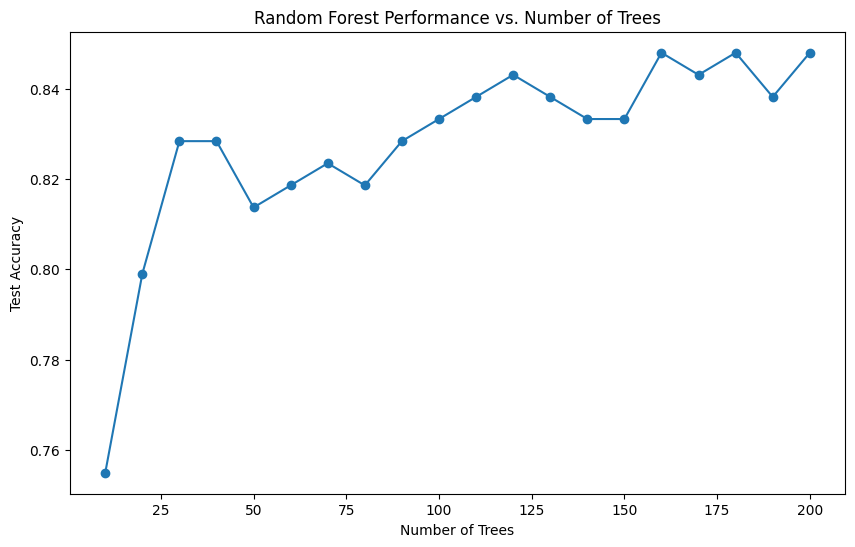

In [68]:
# Use this cell for your code
n_estimators_range = range(10, 201, 10)
accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.title('Random Forest Performance vs. Number of Trees')

3. If we had picked the amount of decision trees by taking the value with the best test accuracy from the last plot, we would have *overfit* our hyperparameters to the test data. Can you see why it is a mistake to tune hyperparameters of your model by using the test data?

### The test dataset is splited from the original dataset like the training dataset, if we select the hyperparameters by using the test dataset, we would have overfit our model to the test dataset, thus lose the generalization ability of the model. When deploying the model on genuine data, the model's performance would be worse as they've been optimized for the specific patterns in the test set rather than the underlying patterns. The fundamental purpose of the test set is to provide an unbiased assessment of model performance on data the model hasn't seen during training. Using it for hyperparameter tuning violates this separation and means we no longer have a truly independent measure of generalization ability

4. Reshuffle and resplit the data so that it is divided in 3 parts: training (80%), validation (10%) and test (10%). Repeatedly train a model of your choosing (e.g random forest) on the training data, and evaluate it’s performance on the validation set, while tuning the hyperparameters so that the accuracy on the validation set increases. Then, finally evaluate the performance of your model on the test data. What can you say in terms of the generalization of your model?

In [4]:
# Use this cell for your code
X_train_val, X_test, y_train_val, y_test = model_selection.train_test_split(Xs, ys, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=0)

best_accuracy = 0
best_params = None
best_model = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=0
            )
            model.fit(X_train, y_train)
            val_accuracy = accuracy_score(y_val, model.predict(X_val))
            
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }
                best_model = model

final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Best Parameters:", best_params)
print("Validation Accuracy:", best_accuracy)
print("Test Accuracy:", final_accuracy)

Best Parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2}
Validation Accuracy: 0.8823529411764706
Test Accuracy: 0.7352941176470589


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | TPOT

The process of picking a suitable model, evaluating its performance and tuning the hyperparameters is very time consuming. A new idea in machine learning is the concept of automating this by using an optimization algorithm to find the best model in the space of models and their hyperparameters. Have a look at [TPOT](https://github.com/EpistasisLab/tpot), an automated ML solution that finds a good model and a good set of hyperparameters automatically. Try it on this data, it should outperform simple models like the ones we tried easily. Note that running the algorithm might take a while, depending on the strength of your computer. 

*Note*: In case it is running for too long, try checking if the parameters you are using when calling TPOT are reasonable, i.e. try reducing number of ‘generations’ or ‘population_size’. TPOT uses cross-validation internally, so we don’t need our own validation set.

In [ ]:
# Use this cell for your code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tpot = TPOTClassifier(generations=3,           
            population_size=15,     
            cv=5,                                 
            max_time_mins=30,       
            max_eval_time_mins=2,   
            random_state=0,
            early_stop=5,           
            verbose=3               
        )
tpot.fit(X_train, y_train)



In [8]:
print(tpot.fitted_pipeline_)


Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('passthrough', Passthrough()),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(shrinkage=0.698282026365,
                                            solver='eigen'))])


In [11]:
import sklearn.metrics as metrics
scorer = metrics.get_scorer('roc_auc_ovr')
print("Test accuracy:", scorer(tpot, X_test, y_test))


Test accuracy: 0.9877828306150296


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**